In [1]:
# 1. Read the provided CSV file ‘data.csv’.
# https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing
# 2. Show the basic statistical description about the data.
# 3. Check if the data has null values.
# a. Replace the null values with the mean
# 4. Select at least two columns and aggregate the data using: min, max, count, mean.
# 5. Filter the dataframe to select the rows with calories values between 500 and 1000.
# 6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
# 7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.
# 8. Delete the “Maxpulse” column from the main df dataframe
# 9. Convert the datatype of Calories column to int datatype.
# 10. Using pandas create a scatter plot for the two columns (Duration and Calories).

In [1]:
import pandas as pd
import numpy

data = pd.read_csv("data.csv")

In [2]:
data

Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]

In [3]:
data.describe()

Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000

In [4]:
data.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [5]:
nan_dataframe = pd.isnull(data["Calories"])
data[nan_dataframe]

Duration  Pulse  Maxpulse  Calories
17         45     90       112       NaN
27         60    103       132       NaN
91         45    107       137       NaN
118        60    105       125       NaN
141        60     97       127       NaN

In [6]:
data.fillna(data.mean(), inplace=True)

In [7]:
data.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [8]:
data.agg({'Duration':['min','max','count','mean'],'Pulse':['min','max','count','mean'],'Maxpulse'
:['min','max','count','mean'],'Calories':['min','max','count','mean']})

Duration       Pulse    Maxpulse     Calories
min     15.000000   80.000000  100.000000    50.300000
max    300.000000  159.000000  184.000000  1860.400000
count  169.000000  169.000000  169.000000   169.000000
mean    63.846154  107.461538  134.047337   375.790244

In [9]:
data.loc[(data['Calories']>500)&(data['Calories']<1000)]

Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
90        180    101       127     600.1
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3

In [10]:
data.loc[(data['Calories']>500)&(data['Pulse']<100)]

Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3

In [11]:
df_modified = data[['Duration','Pulse','Calories']]
df_modified.head()

Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0

In [12]:
del data['Maxpulse']

In [13]:
data.head()

Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0

In [14]:
data.dtypes

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [15]:
data['Calories'] = data['Calories'].astype(numpy.int64)
data.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

<Axes: xlabel='Duration', ylabel='Calories'>

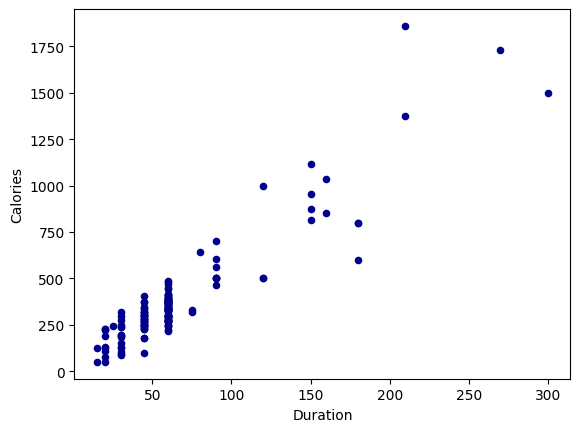

In [16]:
data.plot.scatter(x='Duration',y='Calories',c='DarkBlue')